<a href="https://colab.research.google.com/github/AkashMuttalwad/ML_Learning/blob/main/01_seeds_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import some libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import datasets
from sklearn import model_selection
from sklearn import tree
import graphviz

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_excel('/content/drive/MyDrive/seeds data.xlsx')
df

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,Class 1_ 2_3
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area                     210 non-null    float64
 1   Perimeter                210 non-null    float64
 2   Compactness              210 non-null    float64
 3   Length of kernel         210 non-null    float64
 4   Width of kernel          210 non-null    float64
 5   Asymmetry coefficient    210 non-null    float64
 6   Length of kernel groove  210 non-null    float64
 7   Class 1_ 2_3             210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [6]:
df.describe()

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,Class 1_ 2_3
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [7]:
#Check missing values 
df.isna().sum()

Area                       0
Perimeter                  0
Compactness                0
Length of kernel           0
Width of kernel            0
Asymmetry coefficient      0
Length of kernel groove    0
Class 1_ 2_3               0
dtype: int64

Statistical summary of independent Features

In [9]:
df.drop('Class 1_ 2_3', axis = 1).describe().T

,count,mean,std,min,25%,50%,75%,max
Area,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
Perimeter,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
Compactness,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
Length of kernel,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
Width of kernel,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
Asymmetry coefficient,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
Length of kernel groove,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


Distribution plot 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


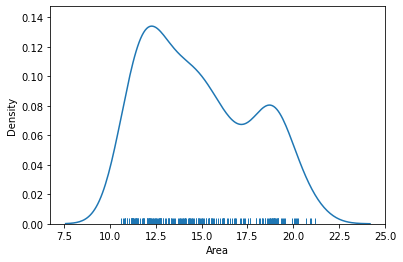

In [12]:
sns.distplot(df['Area'], rug=True, hist=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


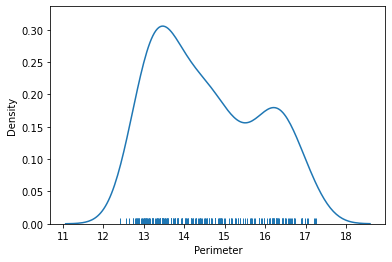

In [13]:
sns.distplot(df['Perimeter'], rug=True, hist=False)

# **outliers in dataset**

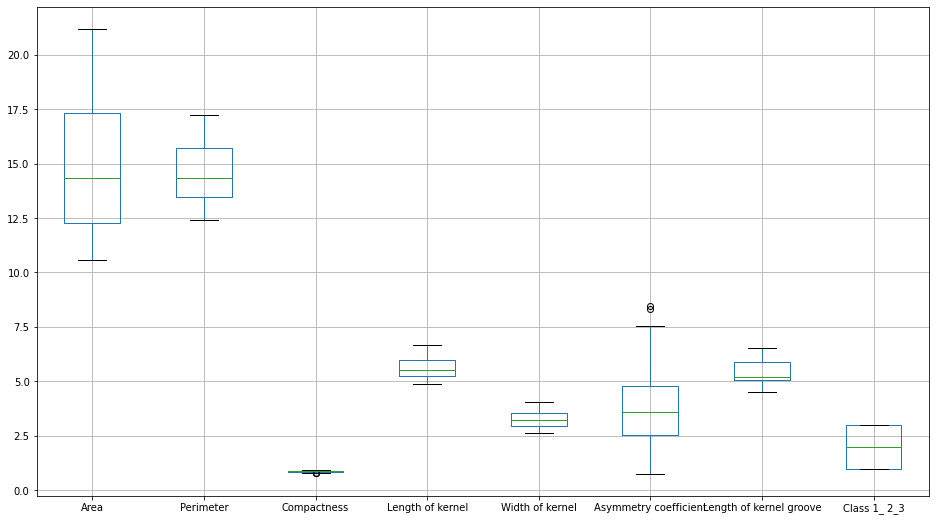

In [37]:
df.boxplot(figsize=(16,9));


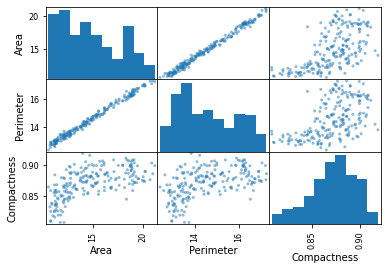

In [38]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
  
# selecting three numerical features
features = ['Area',
            'Perimeter', 'Compactness']
   
# plotting the scatter matrix
# with the features
scatter_matrix(df[features])
plt.show()

**Modal bulding **

In [46]:
#Build the model and create martix x & y:
x = df.drop(('Class 1_ 2_3'),axis = 1)
y = df['Class 1_ 2_3']

In [47]:
print('x shape=', x.shape)
print('y shape=', y.shape)

x shape= (210, 7)
y shape= (210,)


In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 1)
print('x_train dimension= ', x_train.shape)
print('x_test dimension= ', x_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_test dimension= ', y_test.shape)

x_train dimension=  (168, 7)
x_test dimension=  (42, 7)
y_train dimension=  (168,)
y_test dimension=  (42,)


In [49]:
from sklearn import tree

In [50]:

from sklearn.tree import DecisionTreeClassifier

In [51]:
#Creating the classifier object:
clf_gini = DecisionTreeClassifier(criterion = "gini",
			random_state = 100,max_depth=5, min_samples_leaf=5)
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=100)

In [52]:
y_pred = clf_gini.predict(x_test)

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.95      0.97        20
           2       1.00      1.00      1.00         9
           3       0.93      1.00      0.96        13

    accuracy                           0.98        42
   macro avg       0.98      0.98      0.98        42
weighted avg       0.98      0.98      0.98        42



In [55]:
from sklearn.metrics import accuracy_score

In [56]:
#Calculate accuracy_score for test:
accuracy_score(y_test, y_pred)

0.9761904761904762

In [57]:
#Confusion matrix:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[19,  0,  1],
       [ 0,  9,  0],
       [ 0,  0, 13]])

In [58]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           1       1.00      0.95      0.97        20
           2       1.00      1.00      1.00         9
           3       0.93      1.00      0.96        13

    accuracy                           0.98        42
   macro avg       0.98      0.98      0.98        42
weighted avg       0.98      0.98      0.98        42



In [59]:
#On train
y_pred = clf_gini.predict(x_train)

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           1       0.93      0.86      0.90        50
           2       0.98      0.97      0.98        61
           3       0.90      0.98      0.94        57

    accuracy                           0.94       168
   macro avg       0.94      0.94      0.94       168
weighted avg       0.94      0.94      0.94       168



In [61]:
#Calculate accuracy_score for train:
accuracy_score(y_train, y_pred)

0.9404761904761905

In [64]:
#Confusion matrix:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_pred)

array([[43,  1,  6],
       [ 2, 59,  0],
       [ 1,  0, 56]])

In [65]:
from sklearn.metrics import classification_report
cr = classification_report(y_train, y_pred)
print(cr)

              precision    recall  f1-score   support

           1       0.93      0.86      0.90        50
           2       0.98      0.97      0.98        61
           3       0.90      0.98      0.94        57

    accuracy                           0.94       168
   macro avg       0.94      0.94      0.94       168
weighted avg       0.94      0.94      0.94       168



In [66]:
#Creating the classifier object:
clf_entropy = DecisionTreeClassifier(criterion = "entropy",
			random_state = 100,max_depth=3, min_samples_leaf=5)
clf_entropy.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [67]:
#On test
y_pred = clf_entropy.predict(x_test)

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.85      0.92        20
           2       1.00      1.00      1.00         9
           3       0.81      1.00      0.90        13

    accuracy                           0.93        42
   macro avg       0.94      0.95      0.94        42
weighted avg       0.94      0.93      0.93        42



In [69]:
from sklearn.metrics import accuracy_score

In [70]:
#Calculate accuracy_score for test:
accuracy_score(y_test, y_pred)

0.9285714285714286

In [71]:
#Confusion matrix:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[17,  0,  3],
       [ 0,  9,  0],
       [ 0,  0, 13]])

In [73]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)


              precision    recall  f1-score   support

           1       1.00      0.85      0.92        20
           2       1.00      1.00      1.00         9
           3       0.81      1.00      0.90        13

    accuracy                           0.93        42
   macro avg       0.94      0.95      0.94        42
weighted avg       0.94      0.93      0.93        42



In [74]:
#On train
y_pred = clf_gini.predict(x_train)

In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           1       0.93      0.86      0.90        50
           2       0.98      0.97      0.98        61
           3       0.90      0.98      0.94        57

    accuracy                           0.94       168
   macro avg       0.94      0.94      0.94       168
weighted avg       0.94      0.94      0.94       168



In [76]:
#Calculate accuracy_score for train:
accuracy_score(y_train, y_pred)

0.9404761904761905

In [79]:
#Confusion matrix:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_pred)



array([[43,  1,  6],
       [ 2, 59,  0],
       [ 1,  0, 56]])

In [80]:
from sklearn.metrics import classification_report
cr = classification_report(y_train, y_pred)
print(cr)

              precision    recall  f1-score   support

           1       0.93      0.86      0.90        50
           2       0.98      0.97      0.98        61
           3       0.90      0.98      0.94        57

    accuracy                           0.94       168
   macro avg       0.94      0.94      0.94       168
weighted avg       0.94      0.94      0.94       168



In [101]:
pip install pybaobabdt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [100]:
pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [99]:
pip install -q pydot

In [97]:
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgraphviz-dev is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [102]:
import pandas as pd
import pybaobabdt
from sklearn.tree import DecisionTreeClassifier
from scipy.io import arff

In [90]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y_pred)

In [91]:
print(utils.multiclass.type_of_target(y_pred))
print(utils.multiclass.type_of_target(y_pred.astype('int')))


multiclass
multiclass


In [92]:
clf = DecisionTreeClassifier().fit(x_train, y_train)

In [107]:

features = list(df.columns)

AttributeError: ignored